## Preprocessing for Assignment III

    age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0  36.0    1        1           2        1        1         1          1   
1  45.0    1        1           1        1        1         1          1   
2  47.0    1        0           1        1        1         1          1   
3  36.0    1        0           2        1        1         1          1   
4  50.0    1        1           2        1        1         1          1   

   liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
0           1                1        1        1        1          3   
1           1                1        1        1        1         10   
2           1                1        1        1        1         34   
3           1                0        1        1        1          5   
4           1                1        1        1        1          7   

   alk_phosphate  sgot  albumin  protime  histology  target  
0             10    44       16       44        

/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_91948/2056878008.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette="viridis")
/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_91948/2056878008.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="viridis")
/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_91948/2056878008.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="viridis")
/var/folders/y0/5p1rc9fs535fy8254h

<Figure size 1200x800 with 0 Axes>

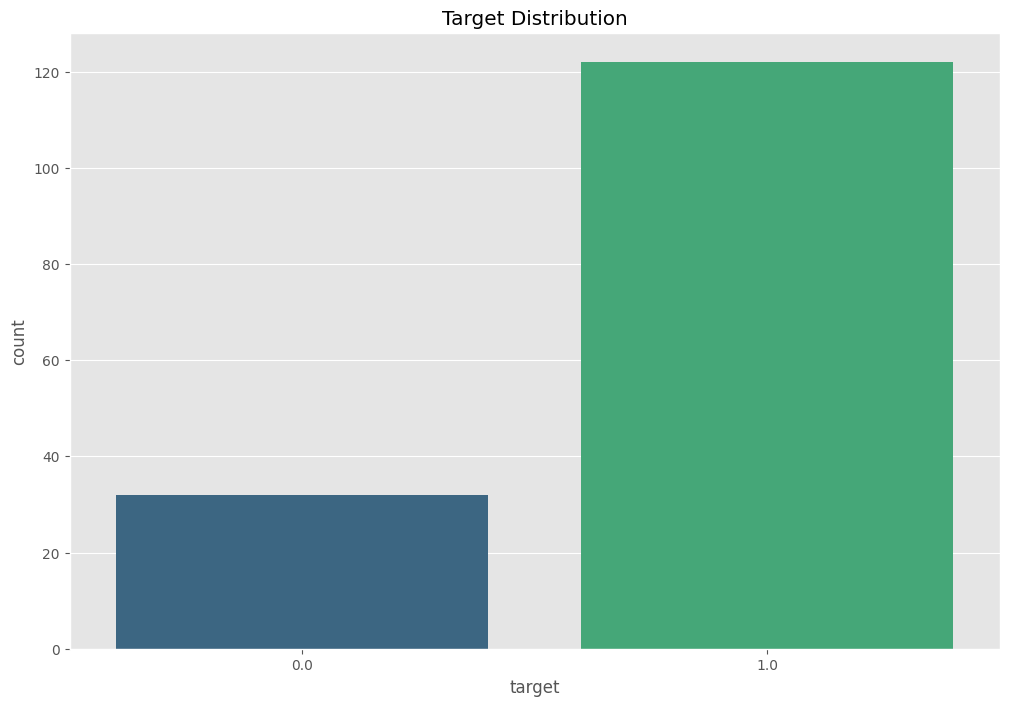

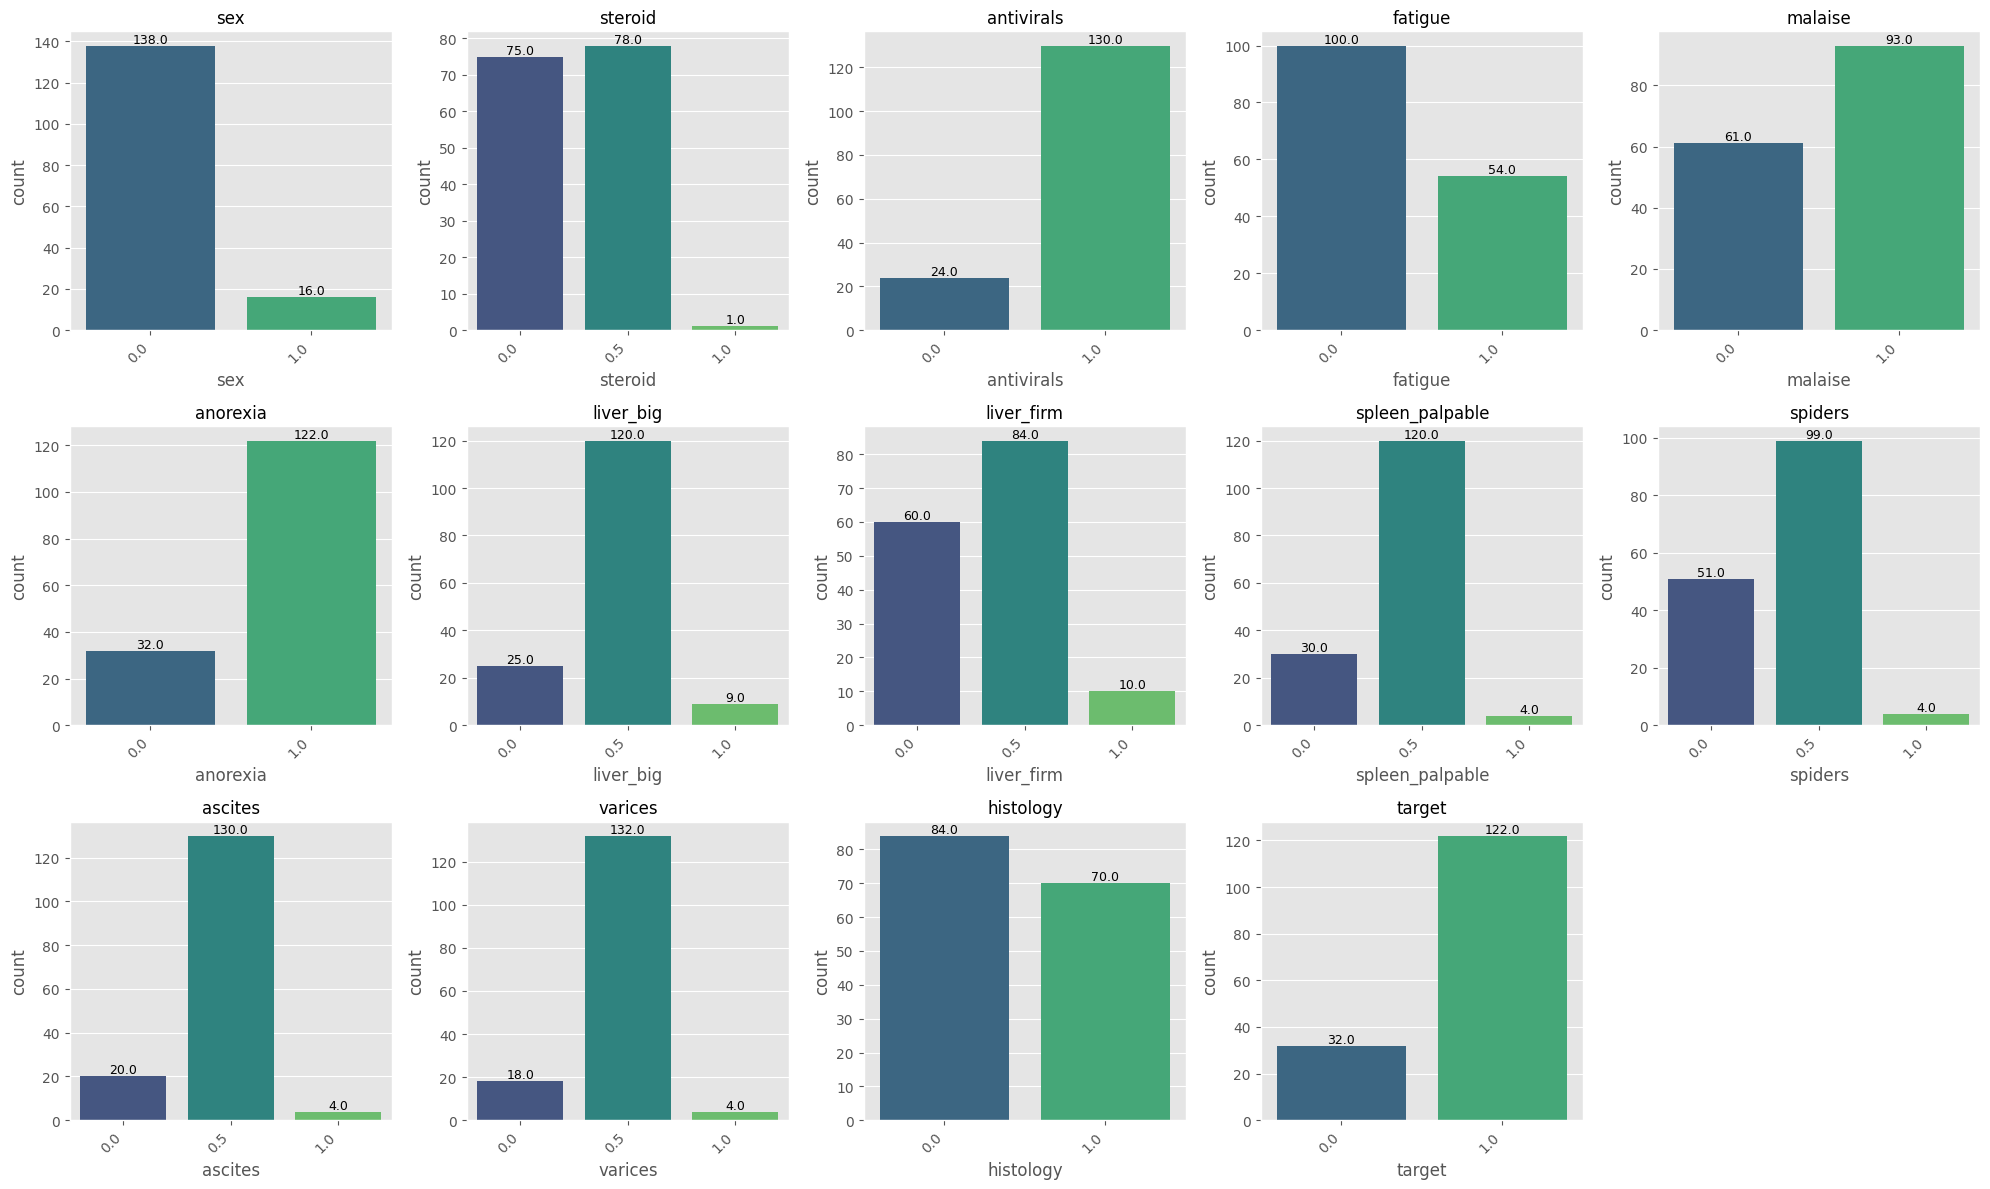

/var/folders/y0/5p1rc9fs535fy8254hdj1qn80000gp/T/ipykernel_91948/2056878008.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="viridis")


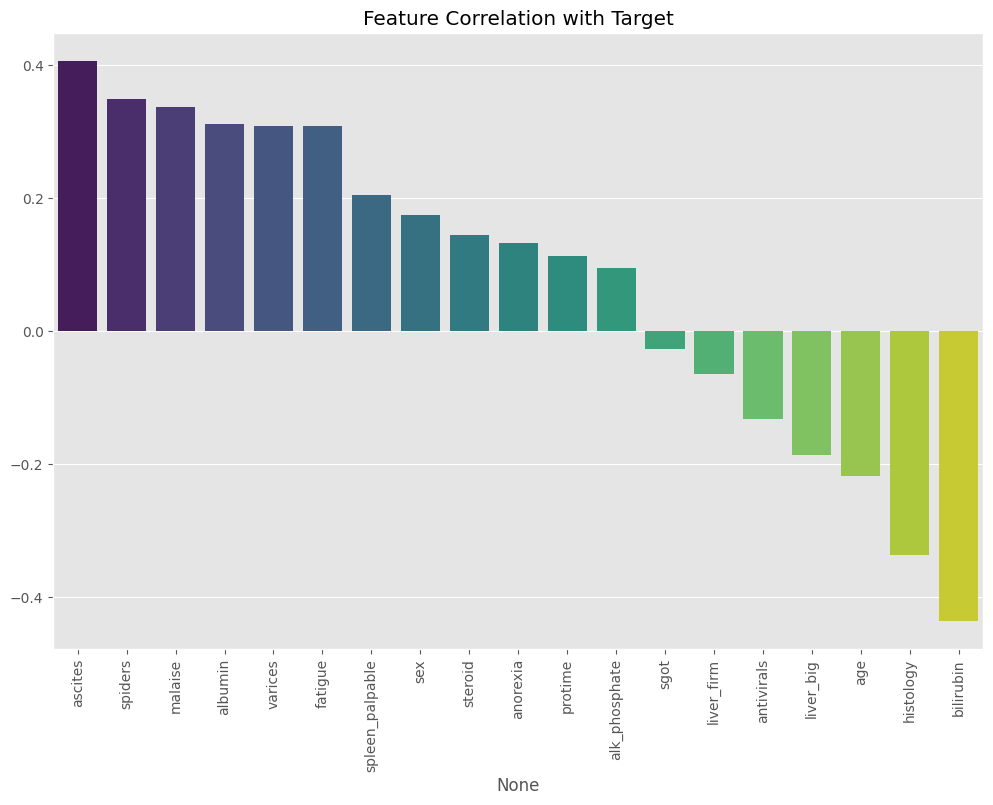

<Figure size 1200x1000 with 0 Axes>

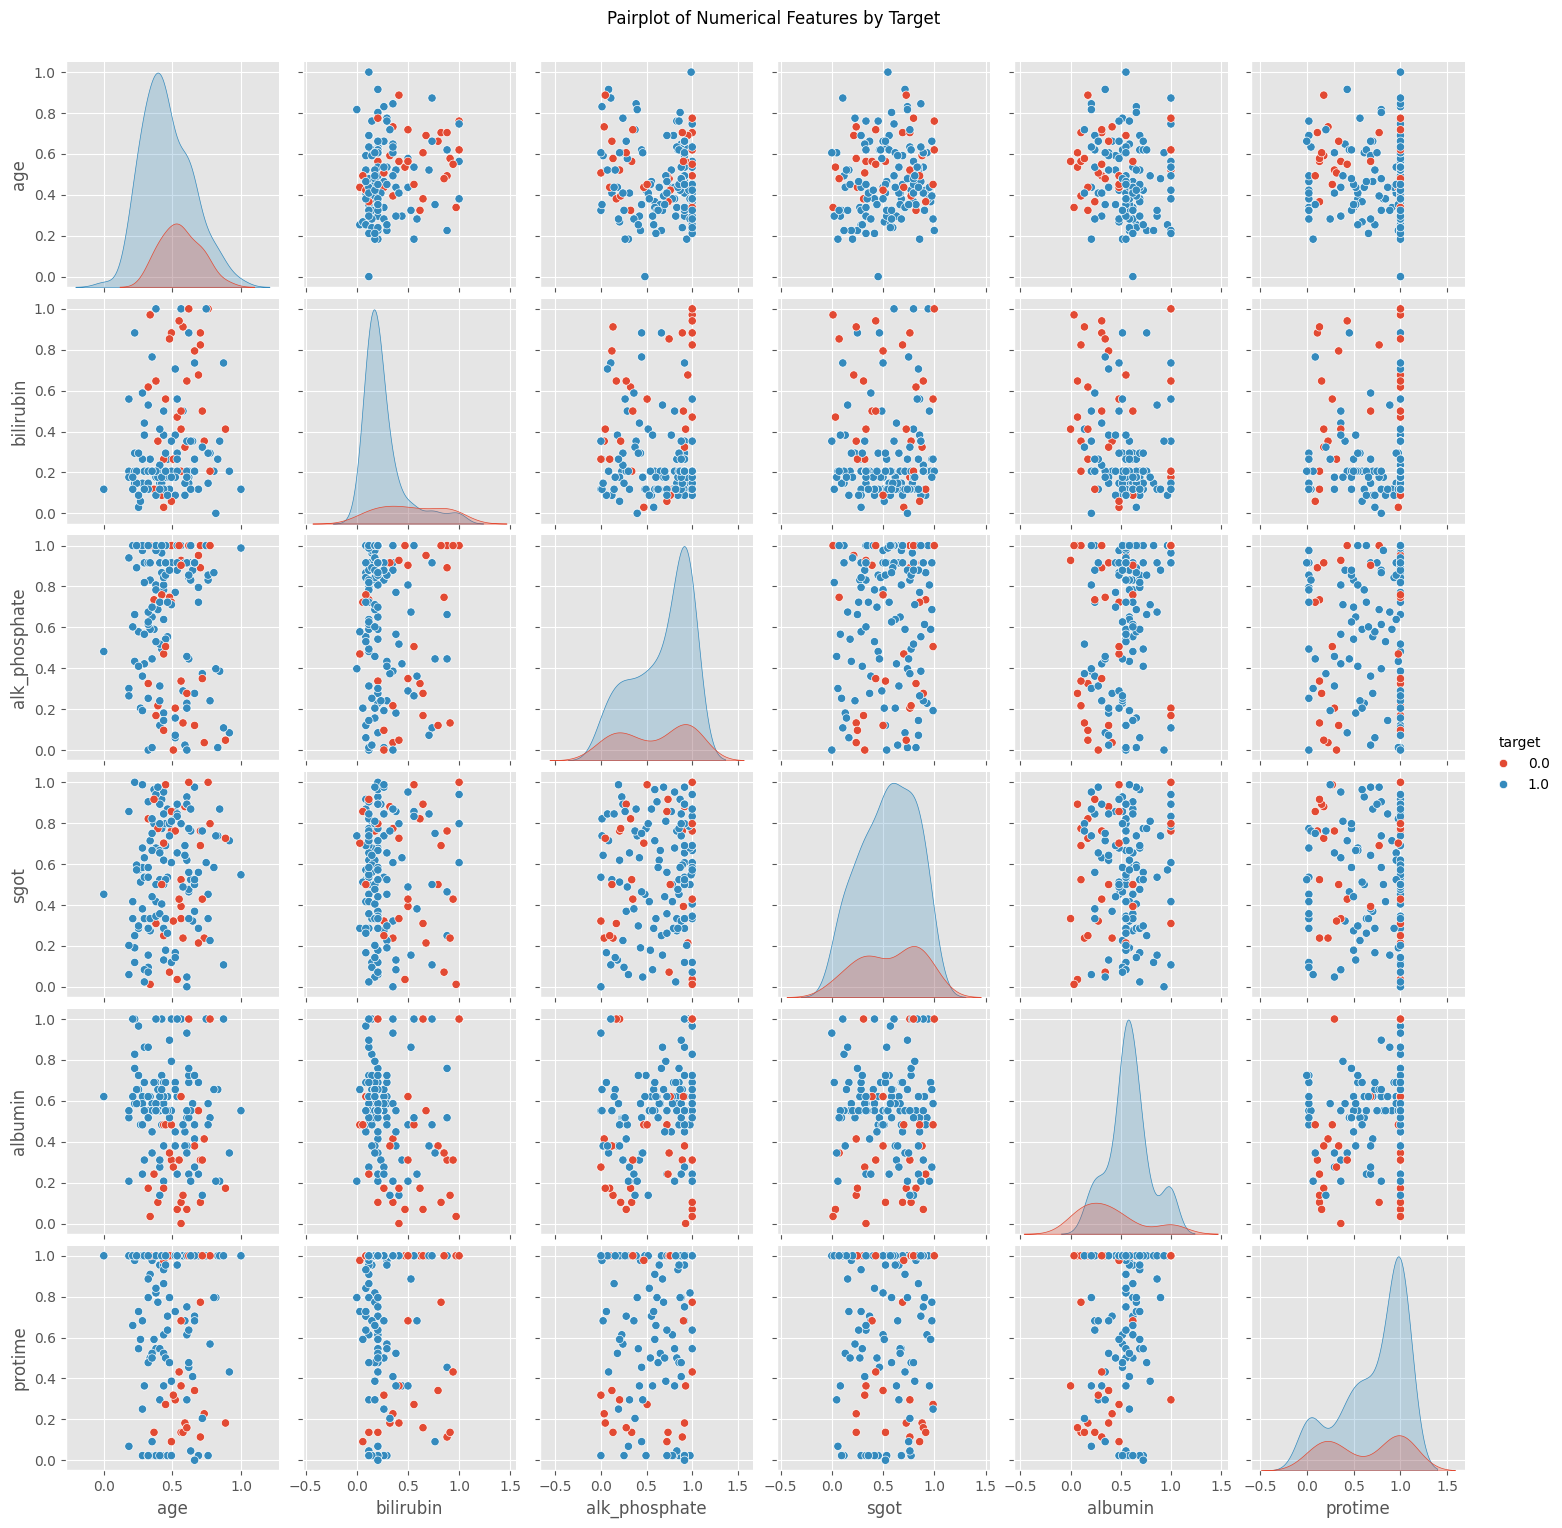

In [2]:
# Import tsv file
import pandas as pd
import os
df = pd.read_csv('hepatitis.tsv', sep='\t')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print(df.head())

import matplotlib.pyplot as plt
import seaborn as sns
def find_outliers(df):
    # Calculate the Z-score for each column
    z_scores = (df - df.mean()) / df.std()
    # Identify outliers (Z-score > 3 or < -3)
    outliers = (z_scores > 3) | (z_scores < -3)
    return outliers
outliers = find_outliers(df)
print("Outliers in the dataset:")
for col in outliers.columns:
    if outliers[col].any():
        print(f"Column '{col}':")
        print(df[outliers[col]])
        print()
print("Original shape:", df.shape)
df = df[~(outliers.any(axis=1))]
print("After removing outliers:", df.shape)
print("Missing values in the dataset:")
print(df.isnull().sum())
print("Duplicate rows in the dataset:")
print(df.duplicated().sum())
print("Summary statistics of the dataset:")
print(df.describe())
print("Min and max of each column:")
print(df.min())
print(df.max())
    
def normalize(df):
    df = (df - df.min()) / (df.max() - df.min())
    return df
df = normalize(df)

print(df.head())

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Basic Dataset Information")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("Column Names and Data Types")
print(df.dtypes)

print("Summary Statistics")
print(df.describe())

print("Missing Values")
print(df.isnull().sum())

print("Unique Values per Column")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

print("\n6. Categorical Variables Distribution")
categorical_cols = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 
                    'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 
                    'VARICES', 'HISTOLOGY', 'target']
categorical_cols = [col.lower() for col in categorical_cols]

for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())

plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))
sns.countplot(x='target', data=df, palette="viridis")
plt.title('Target Distribution')
plt.savefig('target_distribution.png')

import math
n = len(categorical_cols)
cols = 5  # Columns per row
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 4, rows * 4))
for idx, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, idx + 1)
    ax = sns.countplot(x=col, data=df, palette="viridis")
    plt.title(col, fontsize=12)
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
corr_with_target = df.corr()['target'].sort_values(ascending=False)
corr_with_target = corr_with_target.drop('target')
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="viridis")
plt.title('Feature Correlation with Target')
plt.xticks(rotation=90)
plt.savefig('feature_correlation.png')

numerical_cols = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
numerical_cols = [col.lower() for col in numerical_cols]

plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_cols + ['target']], hue='target')
plt.suptitle('Pairplot of Numerical Features by Target', y=1.02)
plt.savefig('pairplot.png')

# Save as tsv
df.to_csv('hepatitis_cleaned.tsv', sep='\t', index=False)